In [218]:
from scipy.stats import norm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/dashabalashova/python_projects/1_1_5_ML_Bioinf/data/noisysine.csv')
df_tr, df_val = train_test_split(df, test_size=0.2)


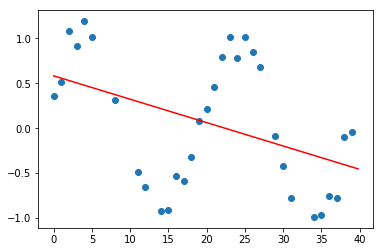

R^2 = 0.0949954757256265


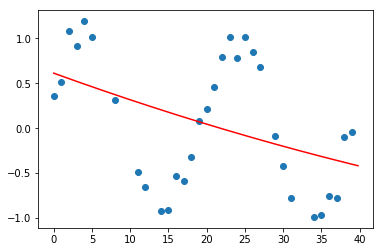

R^2 = 0.102823815715686


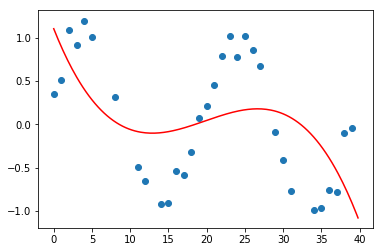

R^2 = 0.15248090111987855


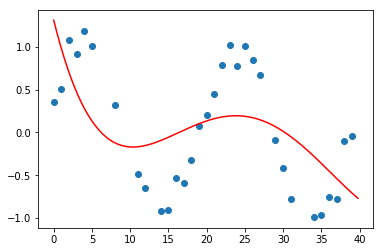

R^2 = 0.16934575177939304


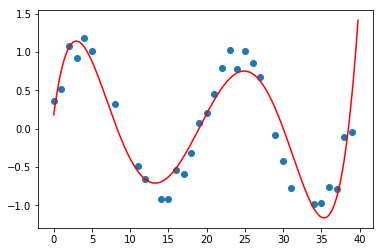

R^2 = 0.9032061788054281


In [219]:
def LR(df, n):
    df = df.reset_index(drop=True)
    X = pd.concat([pd.DataFrame([1]*df.shape[0]), df.x], axis=1)
    
    
    plt.scatter(df.x, df.y)
    t = np.arange(0., 40., 0.2)
    for m in range(2, n+1):
        X['poly_'+str(m)] = X.apply(lambda s: s.x**m, axis = 1)
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)), X.transpose()), df.y.values)
    y_pl = w[0]+w[1]*t
    for m in range(2, n+1):
        y_pl += w[m]*t**m
    return w
 
    
def impl(df, w):
    df = df.reset_index(drop=True)
    X = pd.concat([pd.DataFrame(np.ones(df.shape[0])), df.x], axis = 1)
    n = len(w)-1
    t = np.arange(0., 40., 0.2)
    y_pl = w[0]+w[1]*t
    y_pred = w[0]*pd.Series(np.ones(df.shape[0]))+w[1]*df.x
    for m in range(2, n+1):
        y_pl += w[m]*t**m
        y_pred += w[m]*df.x**m
    plt.plot(t, y_pl, 'r')
    plt.show()
    SS_res = sum((df.y-y_pred)**2)/df.shape[0]
    SS_tot = sum((df.y-np.mean(df.y))**2)/df.shape[0]
    print('R^2 =', 1-SS_res/SS_tot)

        
for n in range(1,6):
    w = LR(df_tr, n)
    impl(df_val, w)

In [252]:
df = pd.read_csv('/Users/dashabalashova/python_projects/1_1_5_ML_Bioinf/data/hydrodynamics.csv')
df_tr, df_val = train_test_split(df, test_size=0.2)

df.head()

def LR2(df, n):
    df = df.reset_index(drop=True)
    X = pd.concat([pd.DataFrame([1]*df.shape[0]), df.drop(columns=['y'])], axis=1)
    if n==2:
        for n1 in range(0,6):
            for n2 in range(n1,6):
                c1 = df.columns[n1]
                c2 = df.columns[n2]
                X[c1+'*'+c2]=X.apply(lambda s: s[c1]*s[c2], axis=1)
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)), X.transpose()), df.y.values)
    return w

def impl2(df, w, n):
    df = df.reset_index(drop=True)
    X = pd.concat([pd.DataFrame([1]*df.shape[0]), df.drop(columns=['y'])], axis=1)
    
    if n==2:
        for n1 in range(0,6):
            for n2 in range(n1,6):
                c1 = df.columns[n1]
                c2 = df.columns[n2]
                X[c1+'*'+c2]=X.apply(lambda s: s[c1]*s[c2], axis=1)
       
    y_pred = w[0]*pd.Series(np.ones(df.shape[0]))
    
    for m in range(1, len(w)):
        
        c1 = X.columns[m]
        
        y_pred += w[m]*X[c1]
    
    SS_res = sum((df.y-y_pred)**2)/df.shape[0]
    SS_tot = sum((df.y-np.mean(df.y))**2)/df.shape[0]
    print('n =', n, ', R^2 =', 1-SS_res/SS_tot)

for n in range(1,3):
    w = LR2(df_tr, n)
    impl2(df_val, w, n)

n = 1 , R^2 = 0.6426083959835622
n = 2 , R^2 = 0.9125189281503203
